In [154]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from numpy import random


import matplotlib
import matplotlib.animation as animation

from IPython.display import HTML

http://ped.fas.harvard.edu/files/ped/files/nature92_0.pdf
https://www.youtube.com/watch?v=WWt3Zwj2yck

- grid of coordinates (n*n)
- each cell initially randomly C or D
- game between all 4 neighbours in turn, add up payoffs
- which strategy had the highest payoff of your neighbours?
- cell turns to this strategy (could be the same, could be different)


- Do I want continuous world?
- Video

### Parameters

In [2]:
# Payoffs, t>r>p>s
t = 1.7 # one player C one player D, D gets t
r = 1 # both players C, they both get r
p = 0 # both defect, both get p
s = 0 # one player C one player D, C gets s

In [3]:
n = 3 # length of grid

In [4]:
# initial proportion of cooperators
prop_c_init = 0.5

In [5]:
rand_seed = 10 # so we use the same seed for testing

### Initial state

In [6]:
def make_initial_grid(n, prop_c_init):
    # n*n matrix randomly 1 (C) or 0 (D)
    random.seed(rand_seed)
    grid_strat = np.random.choice([0, 1], size=(n,n), p=[1 - prop_c_init, prop_c_init])

    return grid_strat

### Play game 

In [7]:
def play_game(player_1, player_2):
    '''
    1 (C) or 0 (D)
    both defect, both get p
    one player C one player D, D gets t
    one player C one player D, C gets s
    both players C, they both get r   
    '''
    if ((player_1 == 0) & (player_2 == 0)):
        payoff_player_1 = p
    elif ((player_1 == 0) & (player_2 == 1)):
        payoff_player_1 = t
    elif ((player_1 == 1) & (player_2 == 0)):
        payoff_player_1 = s 
    else:
        payoff_player_1 = r

    return payoff_player_1

In [8]:
def get_neighbour_strategies(grid_strat):
    
    down_neighbour = np.roll(grid_strat, -1, axis=0) # down
    up_neighbour = np.roll(grid_strat, 1, axis=0) # up
    left_neighbour = np.roll(grid_strat, -1, axis=1) # left
    right_neighbour = np.roll(grid_strat, 1, axis=1) # right
    
    return down_neighbour, up_neighbour, left_neighbour, right_neighbour

In [9]:
def get_cell_payoff(grid_strat,
                    down_neighbour,
                    up_neighbour,
                    left_neighbour,
                    right_neighbour,
                    row, col):
    
    payoff_down_cell = play_game(grid_strat[row,col], down_neighbour[row,col])
    payoff_up_cell = play_game(grid_strat[row,col], up_neighbour[row,col])
    payoff_left_cell = play_game(grid_strat[row,col], left_neighbour[row,col])
    payoff_right_cell = play_game(grid_strat[row,col], right_neighbour[row,col])

    payoff = payoff_down_cell + payoff_up_cell + payoff_left_cell + payoff_right_cell

    return payoff

In [10]:
def get_neighbour_payoffs(grid_payoff):
    
    down_neighbour_payoff = np.roll(grid_payoff, -1, axis=0) # down
    up_neighbour_payoff = np.roll(grid_payoff, 1, axis=0) # up
    left_neighbour_payoff = np.roll(grid_payoff, -1, axis=1) # left
    right_neighbour_payoff = np.roll(grid_payoff, 1, axis=1) # right
    
    return down_neighbour_payoff, up_neighbour_payoff, left_neighbour_payoff, right_neighbour_payoff

In [11]:
def get_strategy_change_code(old_strat, new_strat):
    '''
    0 = stayed as D 
    1 = stayed as C 
    2 = changed from D to C
    3 = changed from C to D
    '''
    if ((old_strat == 0) & (new_strat == 0)):
        change_code = 0
    elif ((old_strat == 0) & (new_strat == 1)):
        change_code = 2
    elif ((old_strat == 1) & (new_strat == 0)):
        change_code = 3 
    else:
        change_code = 1
    return change_code

In [12]:
def one_iteration(grid_strat, n):
    
    # Get the neighbour's strategies:

    (down_neighbour,
     up_neighbour,
     left_neighbour,
     right_neighbour) = get_neighbour_strategies(grid_strat)

    # Get every cell's payoff:

    for row in range(0,n):
        for col in range(0,n):
            grid_payoff[row, col] = get_cell_payoff(grid_strat,
                                                    down_neighbour,
                                                    up_neighbour,
                                                    left_neighbour,
                                                    right_neighbour,
                                                    row, col)

    # Get the neighbour's payoffs:

    (down_neighbour_payoff,
     up_neighbour_payoff,
     left_neighbour_payoff,
     right_neighbour_payoff) = get_neighbour_payoffs(grid_payoff)


    # Consider your neighbours and change if they do better

    for row in range(0,n):
        for col in range(0,n):
            
            # Get previous strategy
            old_strat = grid_strat[row, col]

            # All the surrounding payoffs and your own
            b = np.array([grid_payoff[row, col],
                          right_neighbour_payoff[row,col], left_neighbour_payoff[row,col],
                          up_neighbour_payoff[row,col], down_neighbour_payoff[row,col]])

            # Get the index of the highest
            best_index = np.random.choice(np.flatnonzero(b == b.max())) # if the same pick one randomly
            
            # Update to the strategy of this 'best' cell
            grid_strat[row, col] = [grid_strat[row, col],
                          right_neighbour[row,col], left_neighbour[row,col],
                          up_neighbour[row,col], down_neighbour[row,col]][best_index]
            
            # Get colour matrix
            grid_colours[row, col] = get_strategy_change_code(old_strat, grid_strat[row, col])
    
    return grid_strat, grid_colours

In [13]:
def plot_grid(grid_colours, plot_size_n):
    fig, ax = plt.subplots(figsize=(plot_size_n, plot_size_n))
    ax.imshow(grid_colours)
    plt.show()

### Iterate

4909


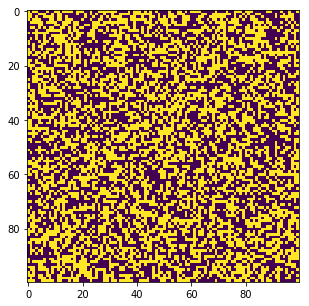

729


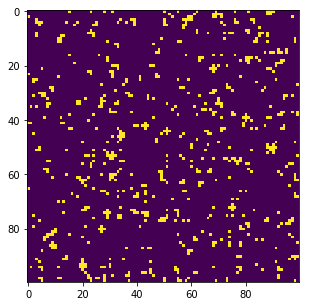

332


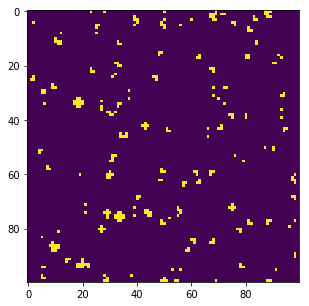

In [63]:
n = 100
prop_c_init = 0.5
plot_size_n = 5

grid_strat = make_initial_grid(n, prop_c_init)

grid_payoff = np.empty((n,n,))
grid_payoff[:] = np.nan

grid_colours = np.empty((n,n,))
grid_colours[:] = np.nan
    
eachitsave = []  
for i in range(0,3):
    grid_stratbb=grid_strat
    
    print(sum(sum(grid_strat)))
    plot_grid(grid_strat, plot_size_n)

    grid_strat, grid_colours = one_iteration(grid_strat, n)


## Get all the data for each frame 

In [188]:
n = 100
prop_c_init = 0.5
plot_size_n = 5

num_frames = 10

grid_strat = make_initial_grid(n, prop_c_init)

grid_payoff = np.empty((n,n,))
grid_payoff[:] = np.nan

grid_colours = np.empty((n,n,))
grid_colours[:] = np.nan
    
grid_strat_all = []
grid_colours_all =[]

grid_strat_all.append(grid_strat.copy())
grid_colours_all.append(grid_colours.copy())
    
for _ in range(0,num_frames):
    
    grid_strat, grid_colours = one_iteration(grid_strat, n)
    
    grid_strat_all.append(grid_strat.copy())
    grid_colours_all.append(grid_colours.copy())


# Make into movie
https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1

In [140]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='Me'), bitrate=1800)

In [183]:
def animate(i):
    
    ax.imshow(grid_strat_all[i])

    return (line,)

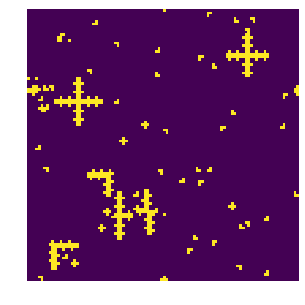

In [190]:
fig, ax = plt.subplots(figsize=(plot_size_n, plot_size_n))
plt.axis('off')
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=num_frames, blit=True)

HTML(anim.to_html5_video())